<a href="https://colab.research.google.com/github/Kokkiligad/first-code/blob/main/Block_Chain_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mining new blocks...
Adding transactions...
Current blockchain:
[
    {
        "index": 1,
        "timestamp": 1743673755.6098156,
        "transactions": [],
        "proof": 1,
        "previous_hash": "0"
    },
    {
        "index": 2,
        "timestamp": 1743673755.7345257,
        "transactions": [
            {
                "sender": "0",
                "recipient": "miner_address",
                "amount": 1
            }
        ],
        "proof": 72608,
        "previous_hash": "d0889e04838d457b57cf4eef12509c95af90e41d6342eeda52be5712187a415b"
    },
    {
        "index": 3,
        "timestamp": 1743673755.7777991,
        "transactions": [
            {
                "sender": "0",
                "recipient": "miner_address",
                "amount": 1
            }
        ],
        "proof": 24348,
        "previous_hash": "71e6dffcdf102524f18b4ca5747ac2e1dbd9a047df3e0246dd1ae4c2c4090953"
    },
    {
        "index": 4,
        "timestamp": 1743673756.07166

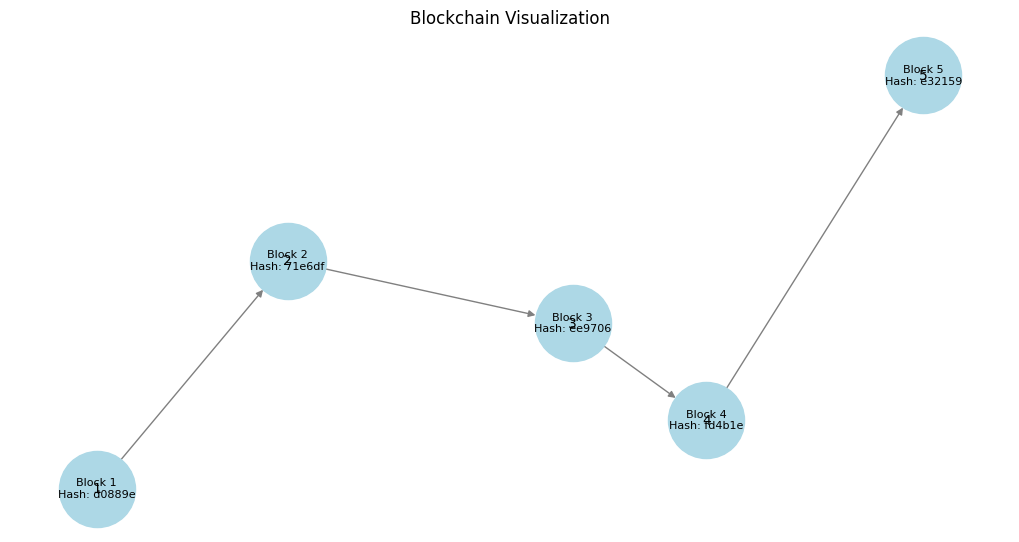

Visualizing Transactions:


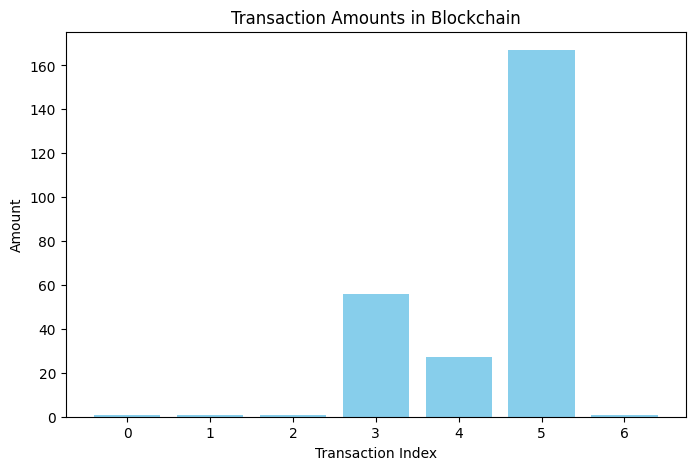

Visualizing Network Nodes:


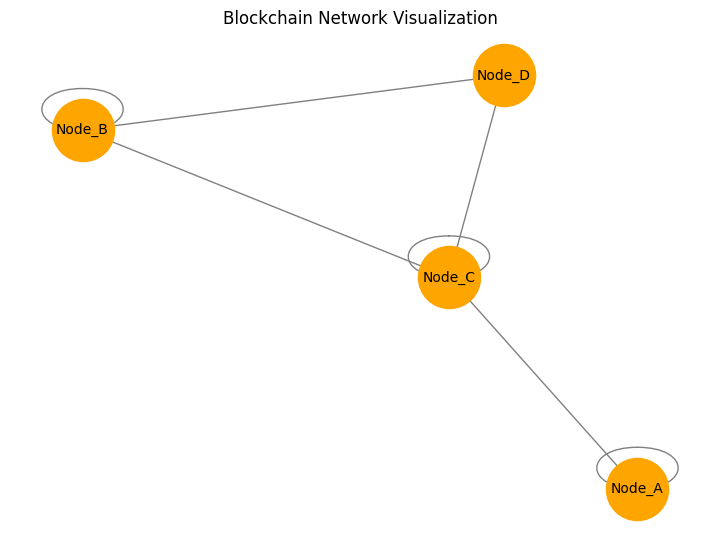

In [6]:
import hashlib
import json
import time
import matplotlib.pyplot as plt
import networkx as nx
import random
from collections import defaultdict

class Blockchain:
     def __init__(self):
         self.chain = []
         self.current_transactions = []
         self.nodes = set()
         self.difficulty = 4  # Adjustable mining difficulty
         self.create_block(proof=1, previous_hash='0')  # Genesis block

     def create_block(self, proof, previous_hash):
         block = {
             'index': len(self.chain) + 1,
             'timestamp': time.time(),
             'transactions': self.current_transactions,
             'proof': proof,
             'previous_hash': previous_hash,
         }
         self.current_transactions = []
         self.chain.append(block)
         return block

     def add_transaction(self, sender, recipient, amount):
         self.current_transactions.append({
             'sender': sender,
             'recipient': recipient,
             'amount': amount,
         })
         return self.last_block['index'] + 1

     def proof_of_work(self, last_proof):
         proof = 0
         while not self.valid_proof(last_proof, proof):
             proof += 1
         return proof

     def valid_proof(self, last_proof, proof):
         guess = f'{last_proof}{proof}'.encode()
         guess_hash = hashlib.sha256(guess).hexdigest()
         return guess_hash[:self.difficulty] == '0' * self.difficulty

     @staticmethod
     def hash(block):
         block_string = json.dumps(block, sort_keys=True).encode()
         return hashlib.sha256(block_string).hexdigest()

     @property
     def last_block(self):
         return self.chain[-1]

     def register_node(self, address):
         self.nodes.add(address)

     def resolve_conflicts(self):
         return True  # Placeholder for consensus mechanism

def mine_block():
     last_block = blockchain.last_block
     proof = blockchain.proof_of_work(last_block['proof'])
     blockchain.add_transaction(sender='0', recipient='miner_address', amount=1)
     previous_hash = blockchain.hash(last_block)
     block = blockchain.create_block(proof, previous_hash)
     return block

def add_transaction(sender, recipient, amount):
     index = blockchain.add_transaction(sender, recipient, amount)
     return f'Transaction will be added to Block {index}'

def get_chain():
     return blockchain.chain

def plot_blockchain():
     G = nx.DiGraph()
     labels = {}

     for block in blockchain.chain:
         index = block['index']
         G.add_node(index)
         labels[index] = f"Block {index}\nHash: {blockchain.hash(block)[:6]}"
         if index > 1:
             G.add_edge(index - 1, index)

     plt.figure(figsize=(10, 5))
     pos = nx.spring_layout(G)
     nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
     nx.draw_networkx_labels(G, pos, labels, font_size=8)
     plt.title("Blockchain Visualization")
     plt.show()

def plot_transactions():
     senders = [tx['sender'] for block in blockchain.chain for tx in block['transactions']]
     recipients = [tx['recipient'] for block in blockchain.chain for tx in block['transactions']]
     amounts = [tx['amount'] for block in blockchain.chain for tx in block['transactions']]

     plt.figure(figsize=(8, 5))
     plt.bar(range(len(amounts)), amounts, color='skyblue')
     plt.xlabel("Transaction Index")
     plt.ylabel("Amount")
     plt.title("Transaction Amounts in Blockchain")
     plt.show()

def plot_network():
     G = nx.Graph()
     nodes = list(blockchain.nodes)
     for node in nodes:
         G.add_node(node)
     for _ in range(len(nodes) * 2):
         G.add_edge(random.choice(nodes), random.choice(nodes))

     plt.figure(figsize=(7, 5))
     nx.draw(G, with_labels=True, node_color='orange', edge_color='gray', node_size=2000, font_size=10)
     plt.title("Blockchain Network Visualization")
     plt.show()

 # Create a blockchain instance
blockchain = Blockchain()

 # Register some nodes
blockchain.register_node("Node_A")
blockchain.register_node("Node_B")
blockchain.register_node("Node_C")
blockchain.register_node("Node_D")

print("Mining new blocks...")
mine_block()
mine_block()
mine_block()

print("Adding transactions...")
add_transaction("Alice", "Bob", random.randint(10, 100))
add_transaction("Charlie", "David", random.randint(20, 150))
add_transaction("Eve", "Frank", random.randint(30, 200))
mine_block()

print("Current blockchain:")
print(json.dumps(get_chain(), indent=4))

print("Visualizing Blockchain:")
plot_blockchain()

print("Visualizing Transactions:")
plot_transactions()

print("Visualizing Network Nodes:")
plot_network()